In [10]:
import matplotlib.pyplot as plt
import numpy as np

from keras.layers import Input, Activation,Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Add,LeakyReLU, UpSampling2D
from keras.models import Model, load_model
from keras.callbacks import ReduceLROnPlateau

In [11]:
x_train = np.load('dataset/x_train.npy')
y_train = np.load('dataset/y_train.npy')
x_val = np.load('dataset/x_val.npy')
y_val = np.load('dataset/y_val.npy')

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(240, 256, 256, 1) (240, 256, 256, 1)
(27, 256, 256, 1) (27, 256, 256, 1)


In [15]:
inputs = Input(shape=(256,256,1))
#이미지의 높이, 너비, 컬러채널 형태의 텐서로 입력

net = Conv2D(32,kernel_size=3, activation='relu',padding='same')(inputs)
#Kernel Size convolution 시야 결정 / activation 활성함수 1. relu 선형 활성 함수
#2. sigmoid 신경망 모델에서 많이 사용되는 비선형 활성 함수 3.tanh 쌍곡 탄젠트 비선형 함수의 종류
#padding 샘플 테두리를 어떻게 할지 조절함. 패딩된 convolution은 input과 동일한 ouput 차원 유지
net = MaxPooling2D(pool_size=2, padding='same')(net)
#다운 샘플링 pool_size : 수직 수평 축소 비율을 정함 
#Input값이 (4,4)인데, pool_size가(2,2)면 영상 크기는 입력 영상의 반으로 줄어듦

net = Conv2D(64,kernel_size=3, activation='relu',padding='same')(net)
net = MaxPooling2D(pool_size=2, padding='same')(net)

net = Conv2D(128,kernel_size=3, activation='relu',padding='same')(net)
net = MaxPooling2D(pool_size=2, padding='same')(net)

net = Dense(128,activation='relu')(net)
#학습이 더 잘 되게 도움

net = UpSampling2D(size=2)(net)
net = Conv2D(128, kernel_size=3, activation ='sigmoid',padding='same')(net)

net = UpSampling2D(size=2)(net)
net = Conv2D(64, kernel_size=3, activation ='sigmoid',padding='same')(net)

net = UpSampling2D(size=2)(net)
outputs = Conv2D(1, kernel_size=3, activation ='sigmoid',padding='same')(net)
#output을 채널 1짜리로
model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam',loss ='binary_crossentropy',metrics=['acc','mse'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 128)       0   

In [16]:
history = model.fit(x_train, y_train, validation_data =(x_val,y_val),
                    epochs=100,batch_size=32,callbacks=[
                        ReduceLROnPlateau(monitor='val_loss',factor=0.2, patience=10, verbose=1,
                                         mode='auto',min_lr=1e-05)
                    ])

Epoch 1/100
8/8 [==============================] - 37s 3s/step - loss: 0.5701 - acc: 0.7629 - mse: 0.1826 - val_loss: 0.4925 - val_acc: 0.7467 - val_mse: 0.1625
Epoch 2/100
8/8 [==============================] - 27s 3s/step - loss: 0.4824 - acc: 0.7614 - mse: 0.1594 - val_loss: 0.4483 - val_acc: 0.7467 - val_mse: 0.1499
Epoch 3/100
8/8 [==============================] - 27s 3s/step - loss: 0.4377 - acc: 0.7663 - mse: 0.1460 - val_loss: 0.4038 - val_acc: 0.7467 - val_mse: 0.1356
Epoch 4/100
8/8 [==============================] - 27s 3s/step - loss: 0.4206 - acc: 0.7482 - mse: 0.1426 - val_loss: 0.3948 - val_acc: 0.7467 - val_mse: 0.1344
Epoch 5/100
8/8 [==============================] - 27s 3s/step - loss: 0.3761 - acc: 0.7651 - mse: 0.1258 - val_loss: 0.4081 - val_acc: 0.7707 - val_mse: 0.1372
Epoch 6/100
8/8 [==============================] - 28s 3s/step - loss: 0.3706 - acc: 0.7983 - mse: 0.1232 - val_loss: 0.3193 - val_acc: 0.8216 - val_mse: 0.1039
Epoch 7/100
8/8 [=================

8/8 [==============================] - 27s 3s/step - loss: 0.0405 - acc: 0.9843 - mse: 0.0083 - val_loss: 0.1216 - val_acc: 0.9705 - val_mse: 0.0213
Epoch 52/100
8/8 [==============================] - 28s 3s/step - loss: 0.0332 - acc: 0.9857 - mse: 0.0071 - val_loss: 0.1216 - val_acc: 0.9705 - val_mse: 0.0213
Epoch 53/100
8/8 [==============================] - 28s 3s/step - loss: 0.0482 - acc: 0.9830 - mse: 0.0096 - val_loss: 0.1223 - val_acc: 0.9707 - val_mse: 0.0212
Epoch 54/100
8/8 [==============================] - 27s 3s/step - loss: 0.0420 - acc: 0.9840 - mse: 0.0086 - val_loss: 0.1219 - val_acc: 0.9706 - val_mse: 0.0213
Epoch 55/100
8/8 [==============================] - 28s 3s/step - loss: 0.0340 - acc: 0.9858 - mse: 0.0071 - val_loss: 0.1216 - val_acc: 0.9706 - val_mse: 0.0213
Epoch 56/100
8/8 [==============================] - 28s 3s/step - loss: 0.0388 - acc: 0.9848 - mse: 0.0079 - val_loss: 0.1218 - val_acc: 0.9706 - val_mse: 0.0212
Epoch 57/100
8/8 [=======================

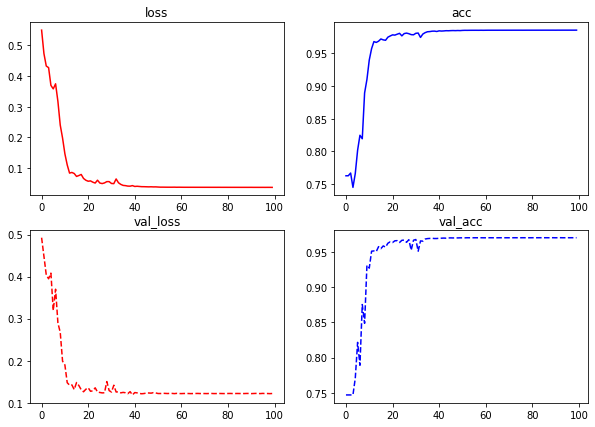

In [18]:
fig, ax = plt.subplots(2,2, figsize =(10,7))

ax[0,0].set_title('loss')
ax[0,0].plot(history.history['loss'],'r')
ax[0,1].set_title('acc')
ax[0,1].plot(history.history['acc'],'b')

ax[1,0].set_title('val_loss')
ax[1,0].plot(history.history['val_loss'],'r--')
ax[1,1].set_title('val_acc')
ax[1,1].plot(history.history['val_acc'],'b--')

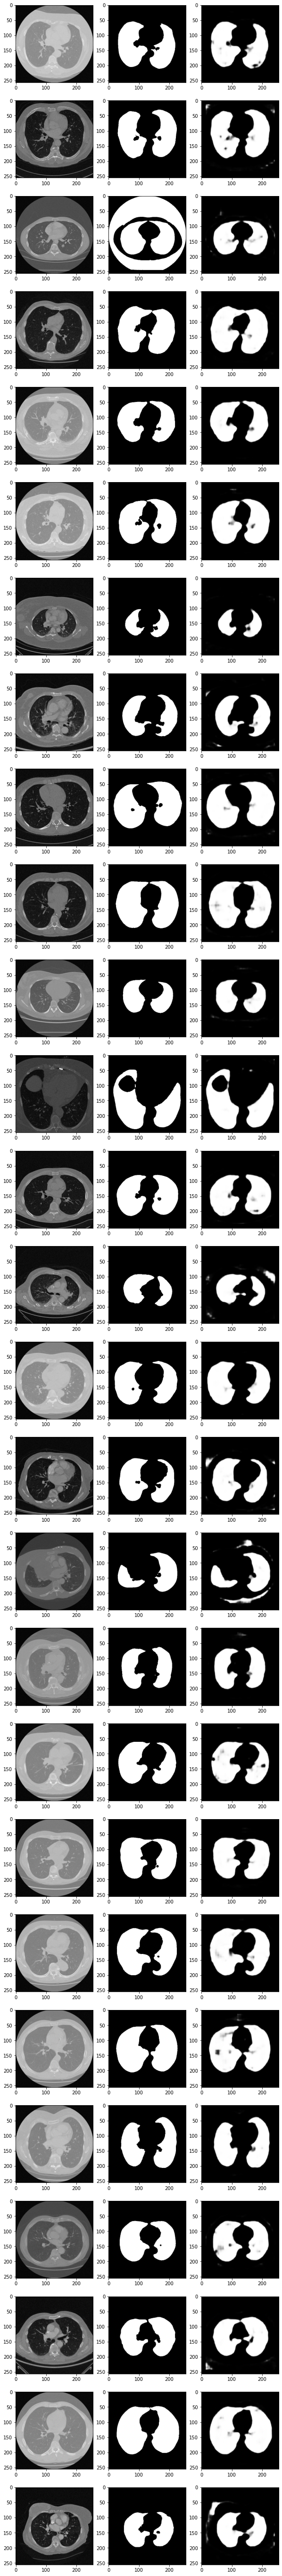

In [20]:
preds = model.predict(x_val)

fig,ax = plt.subplots(len(x_val),3,figsize=(10,100))

for i, pred in enumerate(preds):
    ax[i,0].imshow(x_val[i].squeeze(),cmap='gray')
    ax[i,1].imshow(y_val[i].squeeze(),cmap='gray')
    ax[i,2].imshow(pred.squeeze(),cmap='gray')